In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Assignment 3, Part 1: 

Using the built-in Seaborn dataset mpg, provide a heatmap of the correlation of all the numeric columns and provide a pairplot of the same.

In [4]:
#load the mpg dataset
mpg = sns.load_dataset('mpg')
#drop non-numerical rows
mpgNew = mpg.drop(['origin','name'], axis=1)
mpgNew

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [5]:
mpgNew.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<AxesSubplot:>

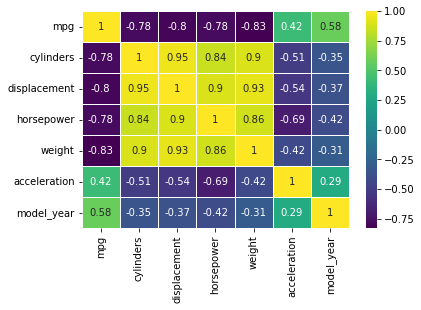

In [8]:
#heatmap of correlation between numeric columns
sns.heatmap(mpgNew.corr(), annot=True, linewidth=.5, cmap = 'viridis')

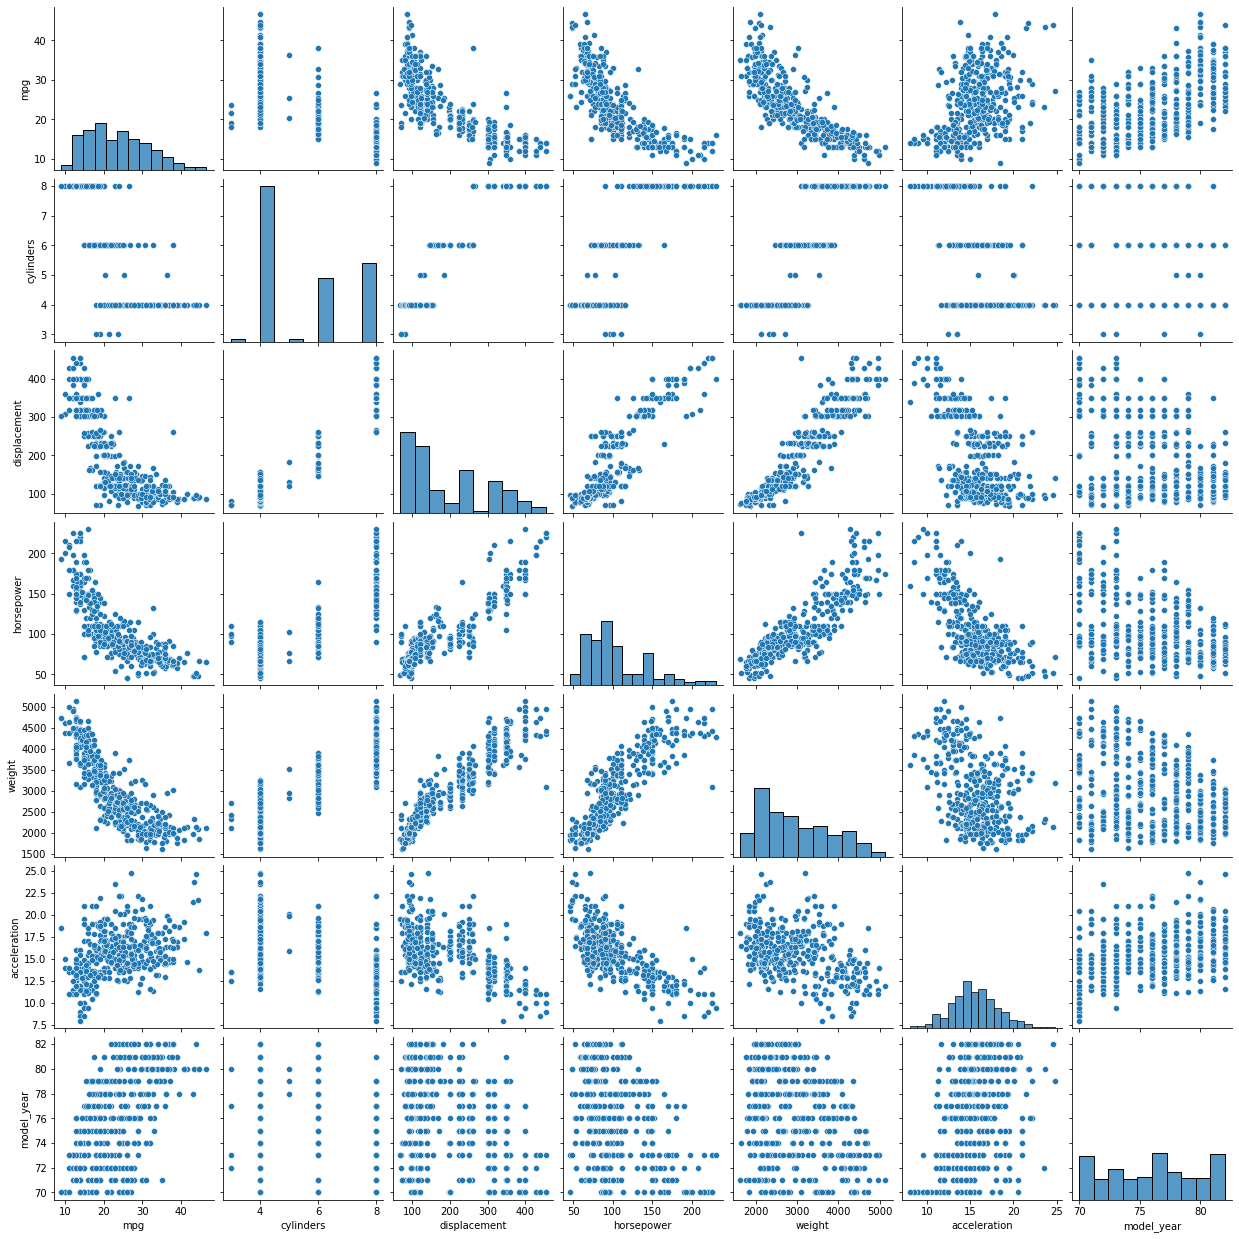

In [9]:
#pairplot of numeric columns
sns.pairplot(mpgNew)

#### Assignment 3, Part 2:

Using the built-in Seaborn dataset diamonds, establish a FacetGrid based on ‘cut’ and ‘color’. Eliminate colors ‘D’ and ‘E’ as well as the cut ‘Fair’. Within that grid, plot the scatterplot for ‘price’ vs. ‘carat’.

In [15]:
#load the diamond dataset
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


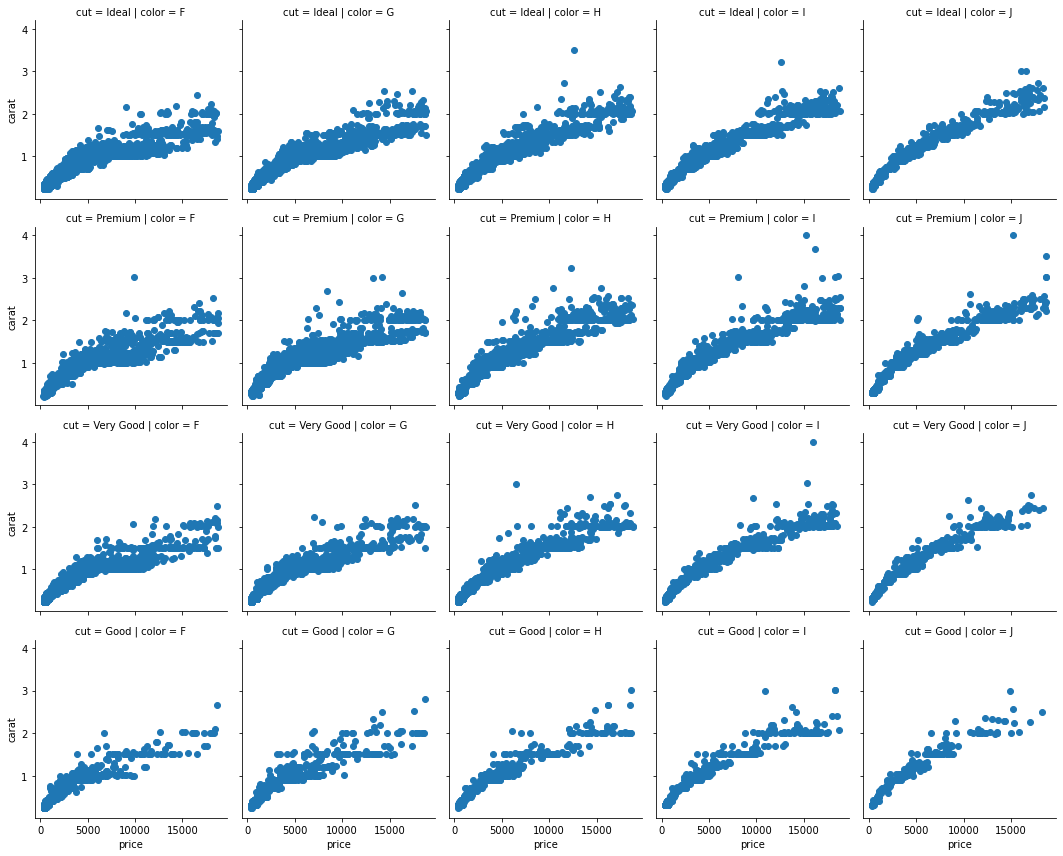

In [18]:
#remove colors 'D' and 'E' as well as the cut 'Fair'
diamonds = diamonds[(~diamonds['color'].isin(['D','E'])) & (diamonds['cut']!='Fair')]

#make sure only 'populated' facets show up after removal of D/E colors and Fair cuts
diamonds['color'] = diamonds['color'].cat.remove_unused_categories()
diamonds['cut'] = diamonds['cut'].cat.remove_unused_categories()

#plot scatterplot for price vs carat
p2 = sns.FacetGrid(diamonds, row='cut', col='color')
p2.map_dataframe(plt.scatter, 'price', 'carat')

#### Assignment 3, Part 3: 

Using the built-in Seaborn dataset car_crashes, prepare plots with a scattergram with the linear model for both the total vs. speeding and the total vs. alcohol.

In [29]:
#load the car crash dataset
crash = sns.load_dataset("car_crashes")
crash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Text(0.5, 1.0, 'Total vs. Speeding')

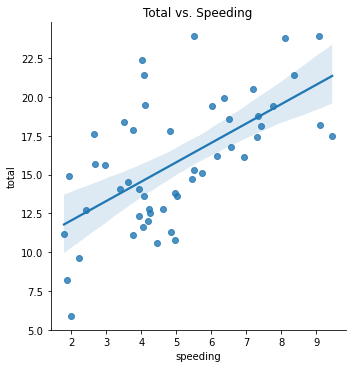

In [30]:
#scatterplot with the linear model for the total vs speed
sns.lmplot(x ='speeding', y ='total', data = crash)
ax1 = plt.gca()
ax1.set_title("Total vs. Speeding")

Text(0.5, 1.0, 'Total vs. Alcohol')

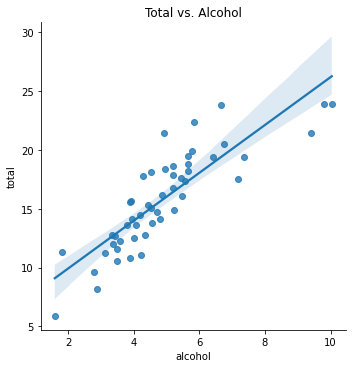

In [31]:
#scatterplot with the linear model for the total vs alcohol
sns.lmplot(x ='alcohol', y ='total', data = crash)
ax2 = plt.gca()
ax2.set_title("Total vs. Alcohol")

#### Assignment 4, Part 4: 

Using the built-in Seaborn dataset iris, provide a plot with four subplots wherein the distribution of each of the numeric columns is presented as a set of boxplots, one for each ‘species’.

In [32]:
#load the iris dataset
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

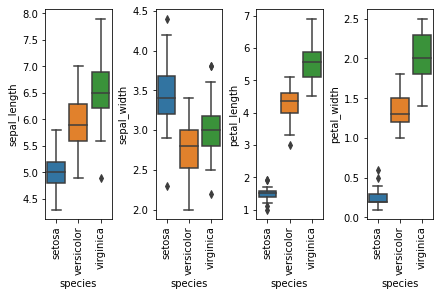

In [44]:
#establish subplots canvas with 4 columns, 1 row, and constrained layout for legible spacing
f, axs = plt.subplots(1, 4, constrained_layout=True)

#create subplots
ax1 = sns.boxplot(  x="species", y= "sepal_length", data=iris,  orient='v' , ax=axs[0])
ax2 = sns.boxplot(  x="species", y= "sepal_width", data=iris,  orient='v' , ax=axs[1])
ax3 = sns.boxplot(  x="species", y= "petal_length", data=iris,  orient='v' , ax=axs[2])
ax4 = sns.boxplot(  x="species", y= "petal_width", data=iris,  orient='v' , ax=axs[3])

#rotate labels for legibility
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)